# Decision tree for regression

In this notebook, we present how decision trees are working in regression
problems. We show differences with the decision trees previously presented in
a classification setting.

First, we load the penguins dataset specifically for solving a regression
problem.

<div class="admonition note alert alert-info">
<p class="first admonition-title" style="font-weight: bold;">Note</p>
<p class="last">If you want a deeper overview regarding this dataset, you can refer to the
Appendix - Datasets description section at the end of this MOOC.</p>
</div>

In [1]:
import os

os.makedirs("../../datasets", exist_ok=True)

In [2]:
%%bash

wget -qO "../../datasets/penguins_regression.csv" "https://github.com/INRIA/scikit-learn-mooc/raw/master/datasets/penguins_regression.csv"

In [14]:
import pandas as pd

penguins = pd.read_csv("../../datasets/penguins_regression.csv")

data_columns = ["Flipper Length (mm)"]
target_column = "Body Mass (g)"

data_train, target_train = penguins[data_columns], penguins[target_column]
penguins.head()

,Flipper Length (mm),Body Mass (g)
0,181.0,3750.0
1,186.0,3800.0
2,195.0,3250.0
3,193.0,3450.0
4,190.0,3650.0


To illustrate how decision trees are predicting in a regression setting, we
will create a synthetic dataset containing all possible flipper length from
the minimum to the maximum of the original data.

In [15]:
import numpy as np

data_test = pd.DataFrame(np.arange(
    data_train[data_columns[0]].min(), data_train[data_columns[0]].max()),
    columns=data_columns)
data_test.head()

,Flipper Length (mm)
0,172.0
1,173.0
2,174.0
3,175.0
4,176.0


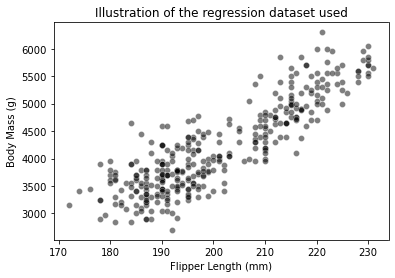

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
    color="black", alpha=0.5)
_ = plt.title("Illustration of the regression dataset used")

We will first illustrate the difference between a linear model and a decision
tree.

In [18]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(data_train, target_train)
target_predicted = linear_model.predict(data_test)

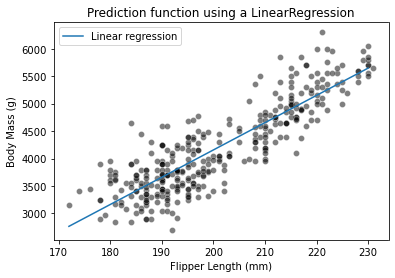

In [7]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
    color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Linear regression")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

On the plot above, we see that a non-regularized `LinearRegression` is able
to fit the data. A feature of this model is that all new predictions
will be on the line.

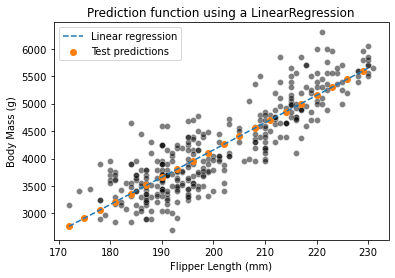

In [8]:
ax = sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
    color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Linear regression",
    linestyle="--")
plt.scatter(data_test[::3], target_predicted[::3], label="Test predictions",
    color="tab:orange")
plt.legend()
_ = plt.title("Prediction function using a LinearRegression")

Contrary to linear models, decision trees are non-parametric models:
they do not make assumptions about the way data is distributed.
This will affect the prediction scheme. Repeating the above experiment
will highlight the differences.

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=1)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

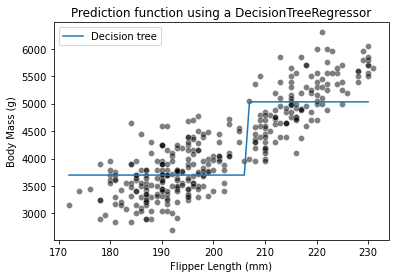

In [10]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
    color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

We see that the decision tree model does not have an *a priori* distribution
for the data and we do not end-up with a straight line to regress flipper
length and body mass.

Instead, we observe that the predictions of the tree are piecewise constant.
Indeed, our feature space was split into two partitions. Let's check the
tree structure to see what was the threshold found during the training.

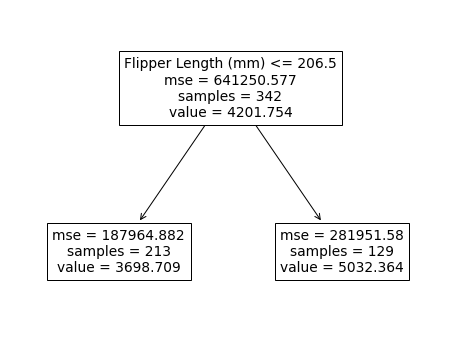

In [11]:
from sklearn.tree import plot_tree

_, ax = plt.subplots(figsize=(8, 6))
_ = plot_tree(tree, feature_names=data_columns, ax=ax)

The threshold for our feature (flipper length) is 206.5 mm. The predicted
values on each side of the split are two constants: 3683.50 g and 5023.62 g.
These values corresponds to the mean values of the training samples in each
partition.

In classification, we saw that increasing the depth of the tree allowed us to
get more complex decision boundaries.
Let's check the effect of increasing the depth in a regression setting:

In [12]:
tree = DecisionTreeRegressor(max_depth=3)
tree.fit(data_train, target_train)
target_predicted = tree.predict(data_test)

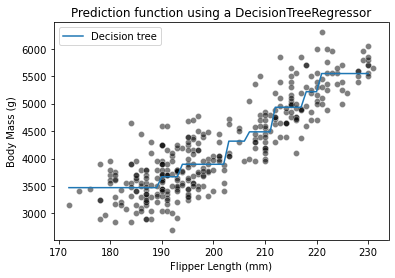

In [13]:
sns.scatterplot(data=penguins, x="Flipper Length (mm)", y="Body Mass (g)",
    color="black", alpha=0.5)
plt.plot(data_test, target_predicted, label="Decision tree")
plt.legend()
_ = plt.title("Prediction function using a DecisionTreeRegressor")

Increasing the depth of the tree will increase the number of partition and
thus the number of constant values that the tree is capable of predicting.

In this notebook, we highlighted the differences in behavior of a decision
tree used in a classification problem in contrast to a regression problem.